In [1]:
import sys
sys.path.append("../src")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from utils.visual_functions import *
from net.metrics import *
from sklearn import metrics 
from sklearn.metrics import multilabel_confusion_matrix
%matplotlib inline
fig_path="../figure/paper/"
plaid_names = ['CFL','ILB','Waterkettle','Fan','AC','HairIron','LaptopCharger','SolderingIron','Fridge','Vacuum','CoffeeMaker','FridgeDefroster']

## Functions

In [2]:
def plot_multiple_fscore(names, scores):
    width = 0.3
    keys  = list(scores.keys())
    score_mean = [scores[keys[i]].mean() for i in range(len(keys))]
    av = max(score_mean)*100
    
    for i in range(len(keys)):
        if i==0:
            widths = width*-1
        if i==1:
            widths = width*0
        else:
            widths = width*1
    plt.barh(np.arange(len(scores[keys[0]]))-width, scores[keys[0]]*100, width, align='center', alpha=0.7, label=keys[0])
    plt.barh(np.arange(len(scores[keys[0]])), scores[keys[1]]*100, width, align='center', alpha=0.7, label=keys[1])
    plt.barh(np.arange(len(scores[keys[0]]))+width, scores[keys[2]]*100, width, align='center', alpha=0.6, label=keys[2])
    ax = plt.gca()
    ax.set(yticks=np.arange(len(names)), yticklabels=names)
    ax.set_xlabel("$F_1$ macro (\%)'")

    ax.axvline(x=av,color='orange', linewidth=1.0, linestyle="--")
    a = '{0:0.2f}'.format(av)
    b = '$ $'+a
    if av > 75:
        OFFSET = -0.7
        plt.text(av-5,OFFSET,b,color='darkorange', fontsize=18)
    else:
        OFFSET = 0
        plt.text(av,OFFSET,b,color='darkorange')
    ax.set_ylabel("",fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    leg=legend(ax,ncol=len(keys), pos=(0.5, -0.15))
    ax.autoscale(tight=True)
   


In [3]:
def get_score_per_model(dataset="plaid", model_name="DNN"):
    width=50
    baseline = False if model_name=="DNN" else True
    if model_name=="MLkNN":
        model_name="MLKNNbaseline" 
    elif model_name=="BRkNN":
        model_name="BRKNNbaseline" 
    else:
        model_name="CNN"
        
    results_all = {}
    per_appliances = {}
    for image_type in [ "current", "vi-binary", "vi", "decomposed_current", "distance", "decomposed_distance", "decomposed_vi"]:
        file_name = f"CNNModel_{dataset}_{image_type}_softmax" if not baseline else f"{model_name}_{dataset}_{image_type}"
        pred = np.load("../results/"+file_name+"_pred.npy")
        true = np.load("../results/"+file_name+"_true.npy")

        results = np.load("../results/"+file_name+"_results.npy", allow_pickle=True).item()
        columns  = list(results.keys())
        results = [results[key] for i, key in enumerate(list(results.keys()) )]
        results = pd.concat(results, axis=1, join='inner')
        results.columns = columns
        results['mean']=results.mean(axis=1)
        results['std']=results.std(axis=1)
        per_appliances[image_type]=example_f1_score(true,pred, per_sample=True, axis=0)
        #per_appliances[image_type]=multilabel_fscore(true, pred)
        results_all[image_type]=results
    return results_all, per_appliances

In [4]:
results_model_all = {}
results_model_per_app = {}
for model_name in ["DNN", "MLkNN", "BRkNN"]:
    res_all, res_app = get_score_per_model(dataset="plaid", model_name=model_name)
    results_model_all[model_name] = res_all
    results_model_per_app[model_name] = res_app

In [5]:
results_model_all["MLkNN"]["vi-binary"].round(3)
#results_model_per_app["DNN"]["current"]

,1,2,3,4,5,6,7,8,9,10,mean,std
subACC,0.580,0.626,0.607,0.614,0.617,0.637,0.706,0.629,0.689,0.554,0.626,0.043
JACC,0.616,0.639,0.637,0.648,0.687,0.681,0.719,0.657,0.717,0.610,0.661,0.037
HA,0.940,0.948,0.948,0.949,0.952,0.954,0.962,0.949,0.962,0.940,0.950,0.007
ebF1,0.777,0.793,0.812,0.811,0.827,0.826,0.842,0.807,0.844,0.761,0.810,0.025
miF1,0.740,0.771,0.776,0.777,0.796,0.800,0.820,0.773,0.828,0.747,0.783,0.027
maF1,0.740,0.762,0.765,0.773,0.797,0.798,0.817,0.770,0.827,0.745,0.779,0.028
meanAUC,0.897,0.912,0.918,0.913,0.912,0.923,0.920,0.906,0.942,0.892,0.914,0.013
medianAUC,0.940,0.921,0.932,0.914,0.912,0.942,0.935,0.943,0.936,0.901,0.927,0.014
meanAUPR,0.770,0.797,0.797,0.803,0.821,0.819,0.831,0.794,0.845,0.769,0.805,0.024
medianAUPR,0.789,0.779,0.792,0.772,0.824,0.848,0.815,0.839,0.818,0.736,0.801,0.032


In [6]:
def plot_model(results_model_all, loc=5):
    title_label = ["$ACC$", "$JACC$", "$HA$", '$\mathrm{eb}F_1$', '$\mathrm{mi}F_1$', "$\mathrm{ma}F_1$"]
    #mean_vi_imax=[results_model_all[model]['vi']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    #std_vi_max=[results_model_all[model]['vi']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    mean_vi=[results_model_all[model]['vi-binary']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    std_vi=[results_model_all[model]['vi-binary']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    mean_current=[results_model_all[model]['current']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    std_current=[results_model_all[model]['current']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    mean_decompose_current=[results_model_all[model]['decomposed_current']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    std_decompose_current=[results_model_all[model]['decomposed_current']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    mean_distance=[results_model_all[model]['distance']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    std_distance=[results_model_all[model]['distance']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    mean_distance_decomposed=[results_model_all[model]['decomposed_distance']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    std_distance_decomposed=[results_model_all[model]['decomposed_distance']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    mean_vi_decomposed=[results_model_all[model]['decomposed_vi']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    std_vi_decomposed=[results_model_all[model]['decomposed_vi']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    fig=figure(fig_width=8, fig_height=7)
    barWidth = 0.2
    # The x position of bars
    r1 = np.arange(len(mean_vi))
    plt.bar(r1-barWidth, mean_vi, width = barWidth,  yerr=std_vi, capsize=7, label='V-I')
    #plt.bar(r1-barWidth, mean_current, width = barWidth,  yerr=std_current, capsize=7, label='Current')
    #plt.bar(r1-barWidth, mean_vi_imax, width = barWidth,  yerr=std_vi_max, capsize=7, label='V-I', alpha=0.6)
    plt.bar(r1, mean_decompose_current, width = barWidth,  yerr=std_decompose_current, capsize=7, label='Decomposed current')
    plt.bar(r1+barWidth, mean_distance, width = barWidth,  yerr=std_distance, capsize=7, label='Distance matrix')
    plt.bar(r1+barWidth*2, mean_distance_decomposed, width = barWidth,  yerr=std_distance_decomposed, capsize=7, label='Decomposed distance matrix')
    plt.xticks(r1+barWidth, ["CNN", "MLkNN", "BRkNN"]);

    ax = plt.gca()  
    format_axes(ax)
    ax.set_ylabel(f'{title_label[loc]} score', fontsize=20)
    ax.set_xlabel("",fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.autoscale(tight=True)
    ax.set_ylim(0.5, 1.0);
    ax.legend(fontsize=14)

In [7]:
def plot_model_current(results_model_all, loc=5):
    title_label = ["$ACC$", "$JACC$", "$HA$", '$\mathrm{eb}F_1$', '$\mathrm{mi}F_1$', "$\mathrm{ma}F_1$"]
    #mean_vi_imax=[results_model_all[model]['vi']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    #std_vi_max=[results_model_all[model]['vi']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    mean_vi=[results_model_all[model]['vi-binary']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    std_vi=[results_model_all[model]['vi-binary']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    mean_current=[results_model_all[model]['current']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    std_current=[results_model_all[model]['current']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    #mean_decompose_current=[results_model_all[model]['decomposed_current']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    #std_decompose_current=[results_model_all[model]['decomposed_current']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    #mean_distance=[results_model_all[model]['distance']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    #std_distance=[results_model_all[model]['distance']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    #mean_distance_decomposed=[results_model_all[model]['decomposed_distance']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    #std_distance_decomposed=[results_model_all[model]['decomposed_distance']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    #mean_vi_decomposed=[results_model_all[model]['decomposed_vi']['mean'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]
    #std_vi_decomposed=[results_model_all[model]['decomposed_vi']['std'].iloc[loc] for model in ["DNN", "MLkNN", "BRkNN"]]

    fig=figure(fig_width=8, fig_height=7)
    barWidth = 0.25
    # The x position of bars
    r1 = np.arange(len(mean_vi))
    
    plt.bar(r1, mean_current, width = barWidth,  yerr=std_current, capsize=7, label='Current')
    plt.bar(r1+barWidth, mean_vi, width = barWidth,  yerr=std_vi, capsize=7, label='VI-binary')
    #plt.bar(r1-barWidth, mean_vi_imax, width = barWidth,  yerr=std_vi_max, capsize=7, label='Binary-VI with $i_{max}$', alpha=0.6)
    #plt.bar(r1, mean_decompose_current, width = barWidth,  yerr=std_decompose_current, capsize=7, label='decomposed-current', alpha=0.6)
    #plt.bar(r1+barWidth, mean_distance, width = barWidth,  yerr=std_distance, capsize=7, label='Distance matrix', alpha=0.6)
    #plt.bar(r1+barWidth*2, mean_distance_decomposed, width = barWidth,  yerr=std_distance_decomposed, capsize=7, label='Decomposed-distance', alpha=0.6)
    plt.xticks(r1+barWidth*0.5, ["CNN", "MLkNN", "BRkNN"]);

    ax = plt.gca()
    
    
    ax.set_ylabel(f'{title_label[loc]} score', fontsize=20)
    ax.set_xlabel("",fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(f'Number of active appliances', fontsize=18)     
    ax.tick_params(axis='both', which='major', labelsize=18)
    format_axes(ax)
    ax.autoscale(tight=True)
   
    ax.set_ylim(0.5, 1);
    ax.legend(fontsize=14)

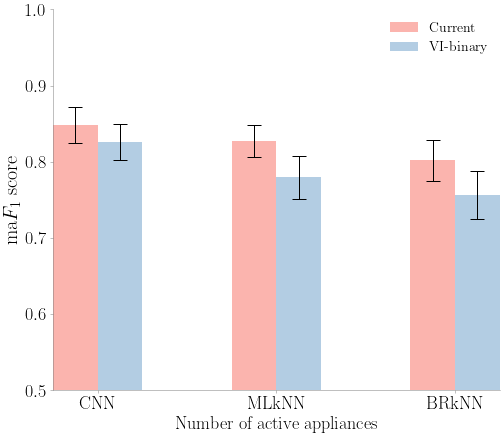

In [8]:
plot_model_current(results_model_all, loc=5)
#savefig(fig_path+"plaid_maf1score_current", format=".pdf")

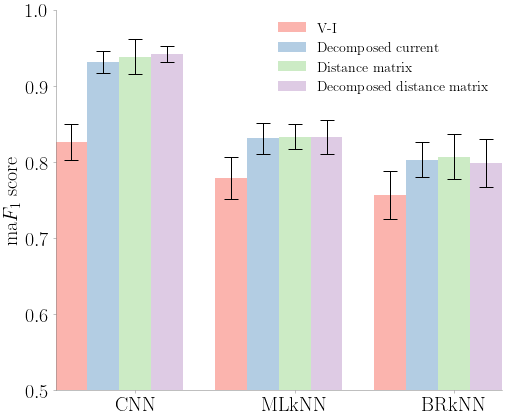

In [9]:
plot_model(results_model_all, loc=5)
#savefig(fig_path+"plaid_maff1score_current_features", format=".png")

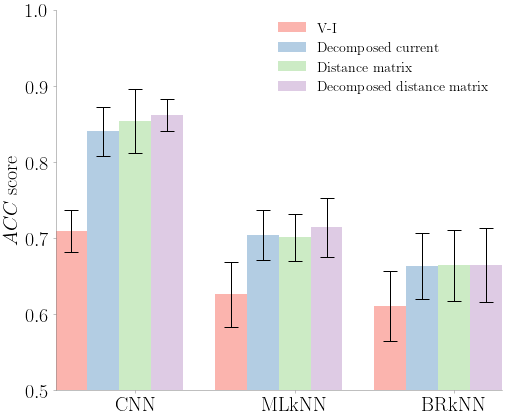

In [10]:
plot_model(results_model_all, loc=0)
#savefig(fig_path+"plaid_accf1score_current_feature", format=".pdf")

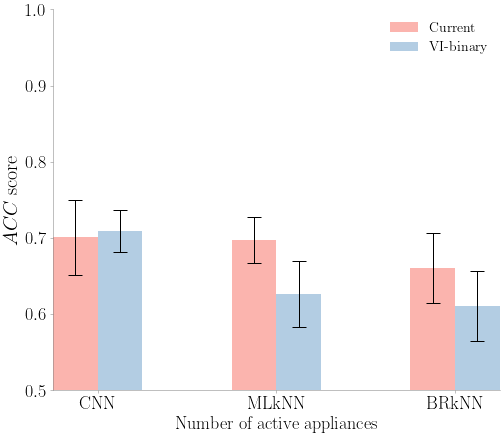

In [11]:
plot_model_current(results_model_all, loc=0)
#savefig(fig_path+"plaid_accf1score", format=".pdf")

## Appliance based score

In [12]:
df = pd.DataFrame(plaid_names, columns=["Appliances"]) 
df['VI-Binary']=results_model_per_app["DNN"]['vi-binary']
df['Current']=results_model_per_app["DNN"]['current']
df['Distance-matrix']=results_model_per_app["DNN"]['distance']
df['Decomposed-current']=results_model_per_app["DNN"]['decomposed_current']
df['Decomposed-distance']=results_model_per_app["DNN"]['decomposed_distance']

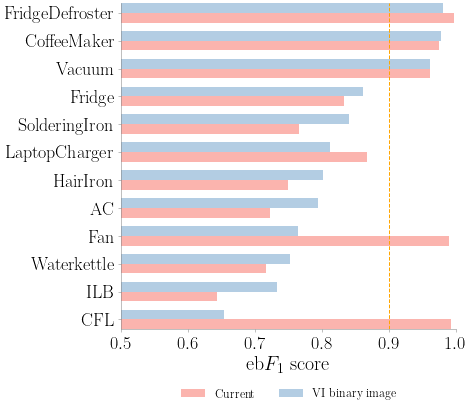

In [13]:
fig = figure(fig_width=6, fig_height=6)
barWidth = 0.35
r1 = np.arange(len(df['Current'].values))
volgorde = np.argsort(df['VI-Binary'].values)
plt.barh(r1,df['Current'].values[volgorde ], height=barWidth,   label='Current')
plt.barh(r1+barWidth,df['VI-Binary'].values[volgorde], height=barWidth,   label='VI binary image')
plt.yticks(r1+barWidth*0.5, df.Appliances.values);

ax = plt.gca() 
ax.axvline(x=0.9,color='orange', linewidth=1.0, linestyle="--")
ax.set_xlabel('$\mathrm{eb}F_1$ score', fontsize=20)
ax.set_ylabel("",fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
format_axes(ax)
ax.autoscale(tight=True)
ax.set_xlim(0.5, 1);
leg=legend(ax,ncol=2, pos=(0.5, -0.15))    
#savefig(fig_path+"plaid_dnn_per_appliances", format=".pdf", leg=leg)

## MLKNN

In [14]:
mlknn = pd.DataFrame(plaid_names, columns=["Appliances"]) 
mlknn['VI-Binary']=results_model_per_app["MLkNN"]['vi-binary']
mlknn['Current']=results_model_per_app["MLkNN"]['current']
mlknn['Distance-matrix']=results_model_per_app["MLkNN"]['distance']
mlknn['Decomposed-current']=results_model_per_app["MLkNN"]['decomposed_current']
mlknn['Decomposed-distance']=results_model_per_app["MLkNN"]['decomposed_distance']

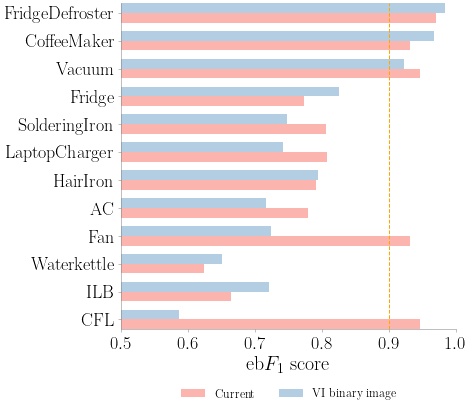

In [15]:
fig = figure(fig_width=6, fig_height=6)
barWidth = 0.35
r1 = np.arange(len(mlknn['Current'].values))
volgorde = np.argsort(df['VI-Binary'].values)
plt.barh(r1,mlknn['Current'].values[volgorde ], height=barWidth,   label='Current')
plt.barh(r1+barWidth,mlknn['VI-Binary'].values[volgorde], height=barWidth,   label='VI binary image')
plt.yticks(r1+barWidth*0.5, mlknn.Appliances.values);

ax = plt.gca() 
ax.axvline(x=0.9,color='orange', linewidth=1.0, linestyle="--")
ax.set_xlabel('$\mathrm{eb}F_1$ score', fontsize=20)
ax.set_ylabel("",fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
format_axes(ax)
ax.autoscale(tight=True)
ax.set_xlim(0.5, 1);
leg=legend(ax,ncol=2, pos=(0.5, -0.15))    
#savefig(fig_path+"plaid_mlknn_per_appliances", format=".pdf", leg=leg)

In [219]:
fig = figure(fig_width=6, fig_height=8)
barWidth = 0.2
r1 = np.arange(len(mlknn['Current'].values))
volgorde = np.argsort(df['VI-Binary'].values)
plt.barh(r1-barWidth,mlknn['VI-Binary'].values[volgorde ], height=barWidth,   label='VI-Binary')
plt.barh(r1,mlknn['Decomposed-current'].values[volgorde ], height=barWidth,   label='Decomposed-current')
plt.barh(r1+barWidth,mlknn['Distance-matrix'].values[volgorde], height=barWidth,   label='Distance')
plt.barh(r1+barWidth*2,mlknn['Decomposed-distance'].values[volgorde], height=barWidth,   label='Decomposed-Distance')
plt.yticks(r1+barWidth, mlknn.Appliances.values);

ax = plt.gca() 
ax.axvline(x=0.9,color='orange', linewidth=1.0, linestyle="--")
ax.set_xlabel('$\mathrm{eb}F_1$ score', fontsize=20)
ax.set_ylabel("",fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
format_axes(ax)
ax.autoscale(tight=True)
ax.set_xlim(0.5, 1);
leg=legend(ax,ncol=2, pos=(0.5, -0.15))    
savefig(fig_path+"plaid_mlkknn_per_appliances_current_feature", format=".pdf", leg=leg)

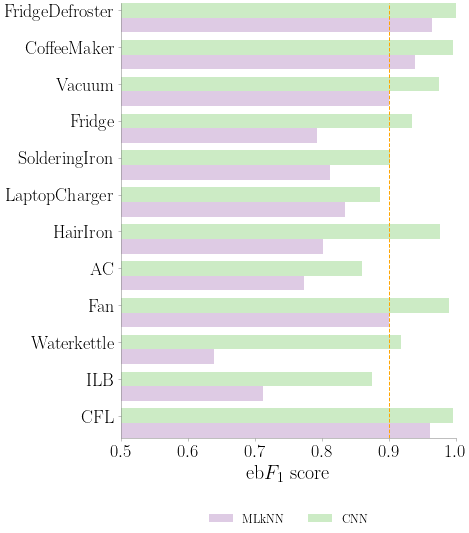

In [16]:
fig = figure(fig_width=6, fig_height=8)
barWidth = 0.4
r1 = np.arange(len(mlknn['Current'].values))
volgorde = np.argsort(df['VI-Binary'].values)
plt.barh(r1,mlknn['Decomposed-distance'].values[volgorde ], height=barWidth,   label='MLkNN',color='C3')
plt.barh(r1+barWidth,df['Decomposed-distance'].values[volgorde ], height=barWidth,   label='CNN', color='C2')
plt.yticks(r1+barWidth, mlknn.Appliances.values);

ax = plt.gca() 
ax.axvline(x=0.9,color='orange', linewidth=1.0, linestyle="--")
ax.set_xlabel('$\mathrm{eb}F_1$ score', fontsize=20)
ax.set_ylabel("",fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
format_axes(ax)
ax.autoscale(tight=True)
ax.set_xlim(0.5, 1);
leg=legend(ax,ncol=2, pos=(0.5, -0.15)) 
#savefig(fig_path+"plaid_mlkknn_cnn_per_appliances_decomposed_distance", format=".png", leg=leg)

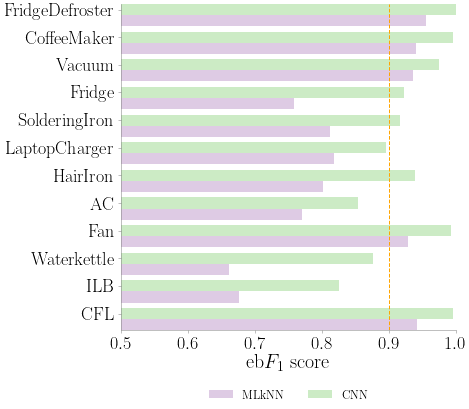

In [222]:
fig = figure(fig_width=6, fig_height=6)
barWidth = 0.4
r1 = np.arange(len(mlknn['Current'].values))
volgorde = np.argsort(df['VI-Binary'].values)
plt.barh(r1,mlknn['Decomposed-current'].values[volgorde ], height=barWidth,   label='MLkNN',color='C3')
plt.barh(r1+barWidth,df['Decomposed-current'].values[volgorde ], height=barWidth,   label='CNN', color='C2')
plt.yticks(r1+barWidth, mlknn.Appliances.values);

ax = plt.gca() 
ax.axvline(x=0.9,color='orange', linewidth=1.0, linestyle="--")
ax.set_xlabel('$\mathrm{eb}F_1$ score', fontsize=20)
ax.set_ylabel("",fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
format_axes(ax)
ax.autoscale(tight=True)
ax.set_xlim(0.5, 1);
leg=legend(ax,ncol=2, pos=(0.5, -0.15)) 
#savefig(fig_path+"plaid_mlkknn_cnn_per_appliances_decomposed_distance", format=".pdf", leg=leg)

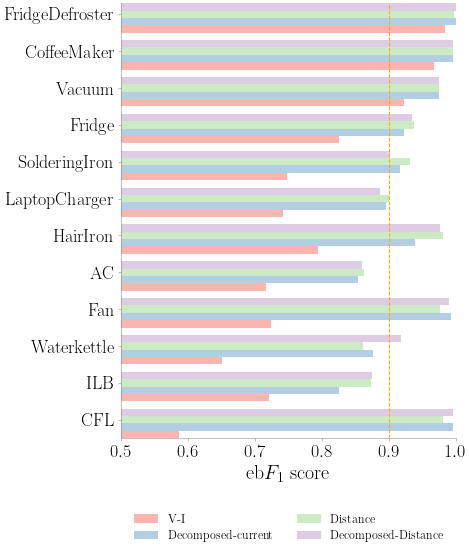

In [17]:
fig = figure(fig_width=6, fig_height=8)
barWidth = 0.2
r1 = np.arange(len(df['Current'].values))
volgorde = np.argsort(df['VI-Binary'].values)
plt.barh(r1-barWidth,mlknn['VI-Binary'].values[volgorde ], height=barWidth,   label='V-I')
plt.barh(r1,df['Decomposed-current'].values[volgorde ], height=barWidth,   label='Decomposed-current')
plt.barh(r1+barWidth,df['Distance-matrix'].values[volgorde], height=barWidth,   label='Distance')
plt.barh(r1+barWidth*2,df['Decomposed-distance'].values[volgorde], height=barWidth,   label='Decomposed-Distance')
plt.yticks(r1+barWidth, df.Appliances.values);

ax = plt.gca() 
ax.axvline(x=0.9,color='orange', linewidth=1.0, linestyle="--")
ax.set_xlabel('$\mathrm{eb}F_1$ score', fontsize=20)
ax.set_ylabel("",fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
format_axes(ax)
ax.autoscale(tight=True)
ax.set_xlim(0.5, 1);
leg=legend(ax,ncol=2, pos=(0.5, -0.15))    
#savefig(fig_path+"plaid_dnn_per_appliances_current_feature", format=".png", leg=leg)

## Per-appliances score

## Error Analysis

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
def to_categorical(classes):
    """ 1-hot encodes a tensor """
    num_classes=len(classes)
    return np.eye(num_classes, dtype='uint8')[[i for i in range(num_classes)]]


def multilabel_hot_decoding(encoding, classes):
    index, = np.where(encoding == 1)
    appliance=np.array(classes)[index]
    return list(appliance)

def get_decode_labels(labels, classes):
    decoded_label=[]
    for label in labels:
        decoded_label.append(multilabel_hot_decoding(label,classes))
    return decoded_label


In [19]:
def list_intersection(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    return a_set.intersection(b_set) 

In [20]:
def errors_analysis(dataset="plaid", image_type="current"):

    file_name = f"CNNModel_{dataset}_{image_type}_softmax" 
    pred = np.load("../results/"+file_name+"_pred.npy")
    true = np.load("../results/"+file_name+"_true.npy")
    predictions = get_decode_labels(pred, plaid_names)  
    corrects     = get_decode_labels(true, plaid_names)
    
    
    active_apps = np.array([len(set(x)) for x in corrects])
    l, activations_count=np.unique(active_apps, return_counts=True)
    three_activation = []
    two_activation   = []
    one_activation   = []

    incorrect_ids = []
    correct_ids = []
    for idx in range(len(predictions)):
        if set(predictions[idx])==set(corrects[idx]):
            correct_ids.append(idx)
        else:
             incorrect_ids.append(idx)                                       
    one_to_many_error = []
    one_to_one_error =[]
    many_to_one_error = []
    many_to_many_error = []
    zero_error = []
    print(f'Total percentage error: {round(len(np.unique(incorrect_ids))*100/len(predictions), 2)}')
    for ids in incorrect_ids:
        #print(f" pred:{str(predictions[ids])} :true:{str(corrects[ids])}")
        if len(predictions[ids])==1 and len(corrects[ids])==1:
            one_to_one_error.append(ids)
        elif len(predictions[ids])==0 and len(corrects[ids])>=1:
            zero_error.append(ids)
        else:
            many_to_many_error.append(ids)
        #if len(predictions[ids])>1 and len(corrects[ids])==1:
            #one_to_many_error.append(ids)
        #if len(predictions[ids])==1 and len(corrects[ids])>1:
           # many_to_one_error.append(ids)
        #if len(predictions[ids])>1 and len(corrects[ids])>1:
            #many_to_many_error.append(ids)
    complete_error = []
    one_error = []
    two_error = []
    three_error =[]

    for idx in many_to_many_error:
        int_list=list_intersection(predictions[idx], corrects[idx])
        if len(int_list)==0:
            complete_error.append(idx)
        if len(int_list)==2:
            one_error.append(idx)
        if len(int_list)==1:
            two_error.append(idx)
        if len(int_list)==3:
            three_error.append(idx)
    
    fourth_activation = []
    three_activation = []
    two_activation   = []
    one_activation   = []
    for idx in correct_ids:
        if len(corrects[idx])==3:
            three_activation.append(idx)
        if len(corrects[idx])==2:
            two_activation.append(idx)
        if len(corrects[idx])==1:
            one_activation.append(idx)
        if len(corrects[idx])==4:
            fourth_activation.append(idx)
    print(f'one-activation:{round(len(one_activation)*100/len(true), 2)}')
    print(f'two-activation:{round(len(two_activation)*100/len(true), 2)}')
    print(f'three-activation:{round(len(three_activation)*100/len(true), 2)}')


    print(f'One-to-one error:{round(len(one_to_one_error)*100/len(np.unique(incorrect_ids)), 2)}')
    print(f'Many-to-many error:{round(len(many_to_many_error)*100/len(np.unique(incorrect_ids)), 2)}')
    print(f'Zero error:{round(len(zero_error)*100/len(np.unique(incorrect_ids)), 2)}')
    print(f'one-error:{round(len(one_error)*100/len(many_to_many_error), 2)}')
    print(f'two-error:{round(len(two_error)*100/len(many_to_many_error), 2)}')
    print(f'three-error:{round(len(three_error)*100/len(many_to_many_error), 2)}')
    print(f'complete-error:{round(len(complete_error)*100/len(many_to_many_error), 2)}')

    group_names=['zero-to-n', 'one-to-one', 'n-to-n']
    group_size=[round(len(zero_error)*100/len(np.unique(incorrect_ids)), 2), 
                round(len(one_to_one_error)*100/len(np.unique(incorrect_ids)), 2), 
                round(len(many_to_many_error)*100/len(np.unique(incorrect_ids)), 2)]
    subgroup_names=['', '', 'S', 'D',"T", 'C']
    subgroup_size=[round(len(zero_error)*100/len(np.unique(incorrect_ids)), 2),
                  round(len(one_to_one_error)*100/len(np.unique(incorrect_ids)), 2), 
                  round(len(one_error)*100/len(many_to_many_error), 2), 
                  round(len(two_error)*100/len(many_to_many_error), 2), 
                  round(len(three_error)*100/len(many_to_many_error), 2),  
                  round(len(complete_error)*100/len(many_to_many_error), 2)]

    # Create colors
    a, b, c=[plt.cm.Blues, plt.cm.Greys, plt.cm.Greens]

    # First Ring (outside)
    fig, ax = plt.subplots(1,1,figsize=set_figure_size(fig_width=5, fig_height=None, columns=1))
    ax.axis('equal')
    mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
    plt.setp( mypie, width=0.3, edgecolor='white')

    # Second Ring (Inside)
    mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5),  b(0.5),  c(0.5), c(0.4), c(0.3)])
    plt.setp( mypie2, width=0.4, edgecolor='white')
    plt.margins(0,0)
    savefig(fig_path+f"errors_{image_type}", format=".pdf")
    
    errors = [zero_error, one_to_one_error, many_to_many_error]
    many_errors = [one_error, two_error, complete_error]
    correc_activations = [len(one_activation), len(two_activation), len(three_activation)]
    
    return errors, many_errors, len(true), predictions, corrects, correc_activations, activations_count

In [21]:
errors = {}
multiple_errors = {}
pred_total = []
predictions = {}
corrects = {}
corrects_activations = {}
activations_counts = {}
for image_type in ["vi-binary", "decomposed_current",  "decomposed_distance"]:
    err, merr, p_total, pred, corr, corr_activations, count= errors_analysis("plaid", image_type)
    errors[image_type] = err
    multiple_errors[image_type] =merr
    pred_total.append(p_total)
    predictions[image_type]=pred
    corrects[image_type]=corr
    corrects_activations[image_type]= corr_activations
    activations_counts[image_type]=count

Total percentage error: 29.03
one-activation:52.86
two-activation:17.33
three-activation:0.78
One-to-one error:13.43
Many-to-many error:85.67
Zero error:0.9
one-error:16.72
two-error:73.52
three-error:0.0
complete-error:9.76
Total percentage error: 15.94
one-activation:57.63
two-activation:24.61
three-activation:1.82
One-to-one error:3.8
Many-to-many error:95.65
Zero error:0.54
one-error:27.84
two-error:71.59
three-error:0.0
complete-error:0.57
Total percentage error: 13.78
one-activation:57.63
two-activation:26.6
three-activation:1.99
One-to-one error:3.77
Many-to-many error:96.23
Zero error:0.0
one-error:30.72
two-error:68.63
three-error:0.0
complete-error:0.65


### plot percentage errors

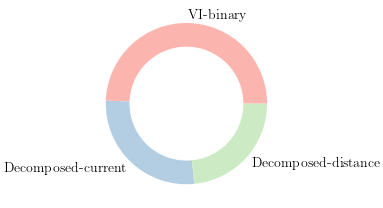

In [22]:
names=["vi-binary",  "decomposed_current", "decomposed_distance"]
size=[sum([len(x) for x in errors[name]]) for name in names]
names=["VI-binary", "Decomposed-current", "Decomposed-distance"]
my_circle=plt.Circle( (0,0), 0.7, color='white')
from palettable.colorbrewer.qualitative import Pastel1_9
fig=figure(fig_width=6)
plt.pie(size, labels=names, colors=Pastel1_9.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
#savefig(fig_path+f"percentage_errors", format=".pdf")

In [23]:
names=["vi-binary", "decomposed_current", "decomposed_distance"]
group_names=["VI-binary", "Decomposed-current", "Decomposed-distance"]
group_size=[sum([len(x) for x in errors[name]]) for name in names]
subgroup_names=['0-err', '1-error', 'N-error']*len(names)
subgroup_size=[[len(l) for l in multiple_errors[name]] for name in names]
error_types=[[len(x) for x in errors[name]] for name in names]

In [24]:
df = pd.DataFrame(group_names, columns=["Feature"]) 
df['total-errors']=group_size
df['zero-error']=[l[0] for i,l in enumerate(error_types)]
df['one-error']=[l[1] for l in error_types]
df['many-error']=[l[2] for l in error_types]
df['single']=[l[0] for l in subgroup_size]
df['double']=[l[1] for l in subgroup_size]
df['complete']=[l[2] for l in subgroup_size]
#df['complete-one']=df['one-error']+df['complete']
df['sum'] = pred_total
df

,Feature,total-errors,zero-error,one-error,many-error,single,double,complete,sum
0,VI-binary,335,3,45,287,48,211,28,1154
1,Decomposed-current,184,1,7,176,49,126,1,1154
2,Decomposed-distance,159,0,6,153,47,105,1,1154


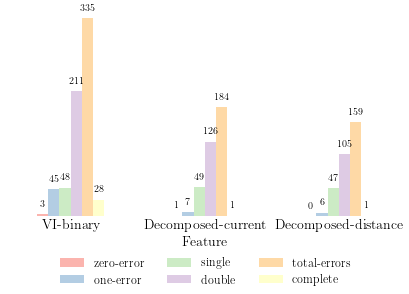

In [25]:
#error=df[["zero-error", "single" , "double",  "complete" ]].iloc[:3]
ax = df.plot.bar(x='Feature', y=["zero-error", 'one-error', "single" , "double", "total-errors", "complete", ], rot=0, 
                          figsize=set_figure_size(fig_width=6, fig_height=None, columns=1))
#ax.set_ylim(0, 300)
for p in ax.patches:
        #ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))
        ax.annotate("${}$".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for spine in ax.spines.values():
        spine.set_visible(False)
plt.yticks([])
plt.tight_layout()        
ax.tick_params(axis="both", which="both", bottom=False, 
               top=False, labelbottom=True, left=False, right=False, labelleft=True)
leg=legend(ax,ncol=3, pos=(0.5, -0.15)) 
#savefig(fig_path+f"percentage_errors_types", format=".pdf")


### Correct activations

In [27]:
dic = {'VI-binary':corrects_activations['vi-binary'],
#'Current':corrects_activations['current'],
'Decomposed-current':corrects_activations['decomposed_current'],
      # 'Distance':corrects_activations['distance'],
  'Decomposed-distance':corrects_activations['decomposed_distance']
}

In [28]:
df=pd.DataFrame.from_dict(dic, orient='index', columns=["1", '2', '3'])
df['Feature']=group_names
df['1inc']=674-df['1'].values
df['2inc']=413-df['2'].values
df['3inc']=67-df['3'].values

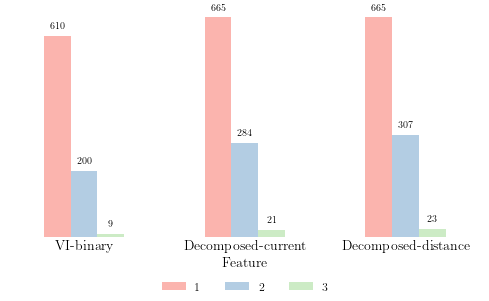

In [29]:

ax = df.plot.bar(x='Feature', y=["1", '2', "3", ], rot=0, 
                          figsize=set_figure_size(fig_width=7, fig_height=4, columns=1))
for p in ax.patches:
        #ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))
        ax.annotate("${}$".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for spine in ax.spines.values():
        spine.set_visible(False)
plt.yticks([])
plt.tight_layout()        
ax.tick_params(axis="both", which="both", bottom=False, 
               top=False, labelbottom=True, left=False, right=False, labelleft=True)
leg=legend(ax,ncol=3, pos=(0.5, -0.15)) 
#savefig(fig_path+f"correct_activations", format=".pdf", leg=leg)

In [30]:
data=pd.DataFrame({'Feature': ['VI-binary','VI-binary','VI-binary',
                      #'Current', 'Current', 'Current', 
                      'Decomposed-current', 'Decomposed-current', 'Decomposed-current',
                     #'Distance', 'Distance', 'Distance',
                     'Decomposed-distance', 'Decomposed-distance', 'Decomposed-distance'],
                 'Active-appliances': ['1', '2', '3']*3,
                'total': [674, 413,  67]*3,
                 'correct': [610, 200, 9,
                           
                             665, 284, 21,
                             
                             665, 307, 23
                            ]})

## Complexity Analysis

In [3]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, FuncFormatter)

In [4]:
baseline = np.load("../results/MLKNNbaseline_decomposed_distance_complexity_results.npy", allow_pickle=True)
cnn = np.load("../results/CNN_decomposed_distance_complexity_results.npy", allow_pickle=True)
fig = figure(columns=1)
plt.plot(cnn[:,0]*100,cnn[:,1]/60, marker='v',   color=colors[1], markersize=3, label="CNN-Train")
plt.plot(cnn[:,0]*100,cnn[:,2]/60, marker='v', linestyle="--", color=colors[1], markersize=3, label="CNN-Inference")
plt.plot(cnn[:,0]*100,baseline[:,1]/60, marker='v',markersize=3,color=colors[0], label="MLkNN-Train")
plt.plot(cnn[:,0]*100,baseline[:,2]/60, marker='v',linestyle="--", color=colors[0],markersize=3, label="MLkNN-Inference")
plt.ylabel('Time ($m$)')
plt.yscale('log')
ax = plt.gca()
ax.minorticks_on()
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(25))
leg=legend(ax,ncol=2, pos=(0.5, -0.18)) 
plt.xlabel('Training data samples ($\%$)')
plt.ylabel('Time ($\log m$)')
savefig(fig_path+f"complexity_model", format=".pdf", leg=leg)

Text(0, 0.5, 'Time ($\\log m$)')

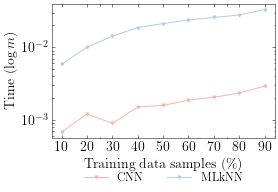

In [5]:
fig = figure(columns=1)
plt.plot(100-cnn[:,0]*100,cnn[:,2]/60, marker='v',markersize=3, label="CNN")
#plt.plot(cnn[:,0]*100,cnn[:,2]/60, color=colors[1], linestyle='--', marker='v',markersize=3, label="Inference CNN")
plt.plot(100-cnn[:,0]*100,baseline[:,2]/60, marker='v',markersize=3, label="MLkNN")
#plt.plot(cnn[:,0]*100,baseline[:,2]/60, color=colors[0], marker='v', linestyle='--', markersize=3, label="Inference MLkNN")
plt.ylabel('Time ($m$)')
plt.yscale('log')
ax = plt.gca()
ax.minorticks_on()
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(25))
leg=legend(ax,ncol=2, pos=(0.5, -0.18)) 
plt.xlabel('Training data samples ($\%$)')
plt.ylabel('Time ($\log m$)')
#savefig(fig_path+f"complexity_model_prediction", format=".pdf", leg=leg)

In [6]:
fig = figure(columns=1)
plt.plot(cnn[:,0]*100,cnn[:,3]*100, color=colors[1], marker='v',markersize=3, label="Train CNN")
plt.plot(cnn[:,0]*100,baseline[:,3]*100, color=colors[0], marker='v',markersize=3, label="Train MLkNN")
plt.ylabel("$F_1$ macro score ($\%$)")
ax = plt.gca()
ax.minorticks_on()
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(25))
leg=legend(ax,ncol=2, pos=(0.5, -0.18)) 
plt.xlabel('Data samples ($\%$)')
savefig(fig_path+f"complexity_model_prediction_score", format=".pdf", leg=leg)

## Visualize Prediction

In [175]:
import torch
from utils.utils import generate_input_feature, create_paa,\
compute_active_non_active_features, generate_input_feature
from utils.data_generator import get_data

In [176]:
from net.modules import MultilabelConv2D, MultilabelConv1D
from sklearn.preprocessing import MultiLabelBinarizer

In [177]:
current, voltage, labels, I_max = get_data(data_type="plaid")
feature = "decomposed_current"
input_feature = generate_input_feature(current, voltage, feature, width=50,  p=2)

Load plaid aggregated data from ../data/plaid/


frze processed: 100 percent: : 1154it [01:25, 13.54it/s]


In [178]:
mlb = MultiLabelBinarizer()
mlb.fit(labels)
y = mlb.transform(labels)
classes=list(np.unique(np.hstack(labels)))
num_class=len(classes)
net =  MultilabelConv1D(in_size=input_feature.size(1), d_model=128, out_size=num_class*2,  dropout=0.25)

In [179]:
saved_model_path= "../checkpoints/CNNModel_plaid_decomposed_current_softmax_fold_10_checkpoint.pt"

In [180]:
checkpoint = torch.load(saved_model_path,  map_location=lambda storage, loc: storage)
net.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [181]:
net = net.eval()

In [172]:
idx = []
for i in range(len(y)):
    if np.unique(y[i], return_counts=1)[-1][-1]==1:
        idx.append(i)
        break
pred = net(input_feature[idx[0]].unsqueeze(0))
batch_size = pred.size(0)
pred = pred.view(batch_size, 2, -1)
pred = torch.max(torch.nn.functional.softmax(pred, 1), 1)[1]
pred = pred.numpy()  
fig = figure(columns=1)
plt.plot(input_feature[idx[0]][0])
plt.ylabel("$i_f(t)$")
plt.title(f"True: {mlb.inverse_transform(y[idx])[0]}, \n Pred: {mlb.inverse_transform(pred)[0]}")
savefig(fig_path+"fan_prediction", format=".pdf")

In [40]:
## Two appliance prediction

In [66]:
for i in range(len(y)):
    if np.unique(y[i], return_counts=1)[-1][-1]==2:
        idx.append(i)
        break
pred = net(input_feature[idx[0]].unsqueeze(0))
batch_size = pred.size(0)
pred = pred.view(batch_size, 2, -1)
pred = torch.max(torch.nn.functional.softmax(pred, 1), 1)[1]
pred = pred.numpy()  
fig = figure(columns=1)
plt.plot(input_feature[idx[0]][0])
plt.ylabel("$i_f(t)$")
plt.title(f"True: {mlb.inverse_transform(y[idx])[0]}, \n Pred: {mlb.inverse_transform(pred)[0]}")
savefig(fig_path+"fan_ac_prediction", format=".pdf")

In [182]:
idx = []
for i in range(len(y)):
    if np.unique(y[i], return_counts=1)[-1][-1]==3:
        idx.append(i)
        

In [183]:
pred = net(input_feature[idx[-2]].unsqueeze(0))
batch_size = pred.size(0)
pred = pred.view(batch_size, 2, -1)
pred = torch.max(torch.nn.functional.softmax(pred, 1), 1)[1]
pred = pred.numpy()
fig = figure(fig_width=3.0)
plt.plot(input_feature[idx[-2]][1]/10, label="$i(t)_a$")
plt.plot(input_feature[idx[-2]][0], label="$i(t)_f$")
plt.legend()
plt.ylabel("Current $A$")
plt.title(f"True: {set(labels[idx[-2]])}, \n Pred: {set(mlb.inverse_transform(pred)[0])}")
savefig(fig_path+"three_appliance_prediction_2", format=".png")

In [185]:
feature = "vi"
input_feature = generate_input_feature(current, voltage, feature, width=50,  p=2)

processed: 1154: : 1154it [00:15, 74.35it/s]


In [186]:
net_vi =  MultilabelConv2D(in_size=1, d_model=128, out_size=num_class*2,  dropout=0.25)
saved_model_path= "../checkpoints/CNNModel_plaid_vi-binary_softmax_fold_10_checkpoint.pt"
checkpoint=torch.load(saved_model_path,  map_location=lambda storage, loc: storage)
net_vi.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [187]:
net_vi.eval()
pred = net_vi(input_feature[idx[-2]].unsqueeze(0))
batch_size = pred.size(0)
pred = pred.view(batch_size, 2, -1)
pred = torch.max(torch.nn.functional.softmax(pred, 1), 1)[1]
pred = pred.numpy()
fig = figure(columns=1)
plt.imshow(input_feature[idx[-2]][0], cmap="gray")
plt.title(f"True: {set(labels[idx[-2]])}, \n Pred: {set(mlb.inverse_transform(pred)[0])}")
savefig(fig_path+"three_appliance_prediction_vi", format=".png")

In [188]:
feature = "decomposed_distance"
input_feature = generate_input_feature(current, voltage, feature, width=50,  p=2)

frze processed: 100 percent: : 1154it [00:58, 19.72it/s]


In [189]:
net_distance_decomposed =  MultilabelConv2D(in_size=2, d_model=128, out_size=num_class*2,  dropout=0.25)
saved_model_path= "../checkpoints/CNNModel_plaid_decomposed_distance_softmax_fold_10_checkpoint.pt"
checkpoint=torch.load(saved_model_path,  map_location=lambda storage, loc: storage)
net_distance_decomposed.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [194]:
net_distance_decomposed.eval()
pred = net_distance_decomposed(input_feature[idx[-2]].unsqueeze(0))
batch_size = pred.size(0)
pred = pred.view(batch_size, 2, -1)
pred = torch.max(torch.nn.functional.softmax(pred, 1), 1)[1]
pred = pred.numpy()
fig = figure(columns=1)
plt.imshow(input_feature[idx[-2]][0], cmap="Spectral")
plt.title(f"True: {set(labels[idx[-2]])}, \n Pred: {set(mlb.inverse_transform(pred)[0])}")
savefig(fig_path+"three_appliance_prediction_decomposed_distance", format=".png")

In [161]:
feature = "current"
input_feature = generate_input_feature(current, voltage, feature, width=50,  p=2)

processed: 100 percent: : 1154it [00:36, 31.56it/s]


In [166]:
net_current =  MultilabelConv1D(in_size=1, d_model=128, out_size=num_class*2,  dropout=0.25)
saved_model_path= "../checkpoints/CNNModel_plaid_current_softmax_fold_10_checkpoint.pt"
checkpoint=torch.load(saved_model_path,  map_location=lambda storage, loc: storage)
net_current.load_state_dict(checkpoint['state_dict'])
net_current =net_current.eval()
pred = net_current(input_feature[idx[-2]].unsqueeze(0))
batch_size = pred.size(0)
pred = pred.view(batch_size, 2, -1)
pred = torch.max(torch.nn.functional.softmax(pred, 1), 1)[1]
pred = pred.numpy()
fig = figure(fig_width=3)
plt.plot(input_feature[idx[-2]][0]/10)
plt.ylabel("Current $A$")
plt.title(f"True: {set(labels[idx[-2]])}, \n Pred: {set(mlb.inverse_transform(pred)[0])}")
savefig(fig_path+"three_appliance_prediction_current", format=".pdf")